## Project Intro (Regression)
# 🧠 Neural Network Regression – Real Estate Price Prediction

<img src = "https://miro.medium.com/1*LaEgAU-vdsR_pClMcgbikQ.jpeg">


In this section, we use a **Neural Network Regressor** (Multilayer Perceptron – MLP) to predict **house prices** from a real estate dataset.

**Dataset:** `Real-estate-dataset.csv`  
**Goal:** Predict the `price` column using other numerical features such as house age, distance to MRT, number of convenience stores, latitude, and longitude.

We will:
1. Load and inspect the data  
2. Prepare features (`X`) and target (`y`)  
3. Scale the features (important for neural networks)  
4. Train an `MLPRegressor`  
5. Evaluate using RMSE and R² score  
6. Visualize predictions and residuals  


## Load and Inspect Data (Regression)

In [1]:
import pandas as pd

# Load real estate datasetReal-estate-dataset.csv
real_estate_df = pd.read_csv("/content/drive/MyDrive/INDE 577 github Jupyter files/Supervised Learning/Gradient Descent/Real-estate-dataset.csv")

print(real_estate_df.head())
print(real_estate_df.info())


   price  No  X1 transaction date  X2 house age  \
0   37.9   1             2012.917          32.0   
1   42.2   2             2012.917          19.5   
2   47.3   3             2013.583          13.3   
3   54.8   4             2013.500          13.3   
4   43.1   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  
0     24.98298     121.54024  
1     24.98034     121.53951  
2     24.98746     121.54391  
3     24.98746     121.54391  
4     24.97937     121.54245  
<class 'pandas.core.frame.DataFrame'>


##Prepare Features and Target (Regression)
We drop the `No` column (it is only an index) and use:

- **Target (`y`)**: `price`
- **Features (`X`)**: all other columns except `price` and `No`


In [3]:
# Drop index-like column
real_estate_df = real_estate_df.drop(columns=["No"])

# Target and features
y_reg = real_estate_df["price"]
X_reg = real_estate_df.drop(columns=["price"])

print("Features shape:", X_reg.shape)
print("Target shape:", y_reg.shape)
X_reg.head()


Features shape: (414, 6)
Target shape: (414,)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


##Train/Test Split and Scaling (Regression)
We split the dataset into training and test sets to evaluate generalization.

Since neural networks are sensitive to feature scales, we use `StandardScaler` to standardize the input features.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale features
reg_scaler = StandardScaler()
X_reg_train_scaled = reg_scaler.fit_transform(X_reg_train)
X_reg_test_scaled = reg_scaler.transform(X_reg_test)


## Build and Train Neural Network Regressor

We create an `MLPRegressor` with:

- Two hidden layers: 64 neurons each
- ReLU activation
- Adam optimizer
- Higher `max_iter` to allow convergence

Then we fit it on the scaled training data.


In [5]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42
)

mlp_reg.fit(X_reg_train_scaled, y_reg_train)

print("Neural Network Regressor training complete.")


Neural Network Regressor training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Evaluate Regression Model

We evaluate the regression performance using:

- **RMSE (Root Mean Squared Error)** – average prediction error in price units  
- **R² score** – how much variance in the target is explained by the model  


Neural Network Regression – RMSE: 6.46
Neural Network Regression – R²:   0.752


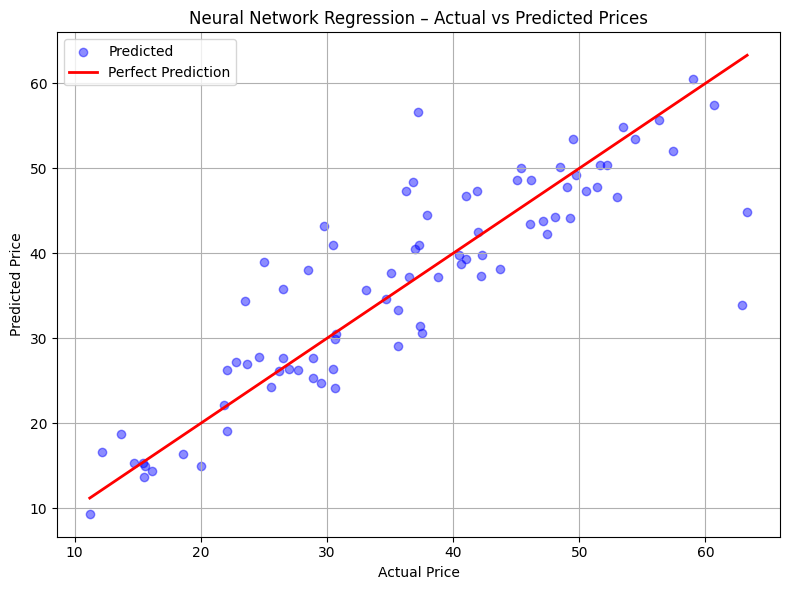

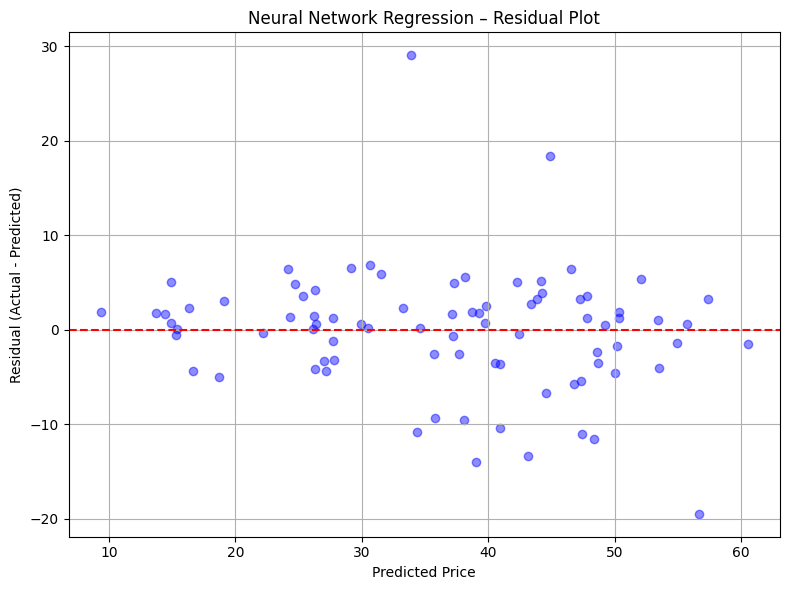

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predictions
y_reg_pred = mlp_reg.predict(X_reg_test_scaled)

# Metrics
reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
reg_rmse = np.sqrt(reg_mse)
reg_r2 = r2_score(y_reg_test, y_reg_pred)

print(f"Neural Network Regression – RMSE: {reg_rmse:.2f}")
print(f"Neural Network Regression – R²:   {reg_r2:.3f}")

def plot_reg_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.45, color="blue", label="Predicted")
    plt.plot(
        [y_true.min(), y_true.max()],
        [y_true.min(), y_true.max()],
        color="red",
        linewidth=2,
        label="Perfect Prediction"
    )
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Neural Network Regression – Actual vs Predicted Prices")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_reg_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.45, color="blue")
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted Price")
    plt.ylabel("Residual (Actual - Predicted)")
    plt.title("Neural Network Regression – Residual Plot")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_reg_predictions(y_reg_test, y_reg_pred)
plot_reg_residuals(y_reg_test, y_reg_pred)
